### Àlex Correa Orri 1564967
### Júlia Pumares Benaiges 1566252

#### Dataset: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [3]:
reset()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  (), please run `%reset?` for details


### MÒDULS I LLIBRERIES

In [4]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
import os
import seaborn as sns
from scipy.stats import shapiro, spearmanr
import math
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import ipympl
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
%matplotlib widget
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

### DIRECTORI DE TREBALL

In [5]:
os.getcwd()
#path = 'C:/Users/alexc/OneDrive/Escritorio/UNI/3er/Aprenentatge Computacional/pràctiques/PRÀCTICA 2/Practica2-Classificacio'
path = 'C:/Users/julia/Downloads'
os.chdir(path)
os.getcwd()
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### LECTURA DE DADES

In [6]:
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('train.csv')

dataset_test = load_dataset('test.csv')

### 1- EDA

In [7]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.200,0,1,0,7,0.600,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.500,1,0,1,53,0.700,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.500,1,2,1,41,0.900,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.500,0,0,0,10,0.800,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.200,0,13,1,44,0.600,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.500,1,3,0,22,0.700,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.700,0,4,1,10,0.800,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.500,1,0,0,24,0.800,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.500,0,0,0,53,0.700,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.600,1,2,1,9,0.100,93,5,...,1137,1224,513,19,10,12,1,0,0,0


#### Atributs

In [8]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#### Determinem com l'atribut objectiu el price_range (4 rangs de preu)

In [9]:
data = dataset.values
l = len(dataset.columns)
X = data[:, :l]
y = data[:, l-1]

#### Correlacions amb l'atribut a predir (price_range)

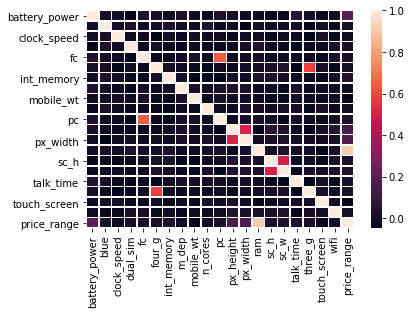

In [10]:
plt.figure()
ax = sns.heatmap(dataset.corr(), annot=False, linewidths=.5)

In [11]:
dataset.corr()['price_range']

battery_power    0.201
blue             0.021
clock_speed     -0.007
dual_sim         0.017
fc               0.022
four_g           0.015
int_memory       0.044
m_dep            0.001
mobile_wt       -0.030
n_cores          0.004
pc               0.034
px_height        0.149
px_width         0.166
ram              0.917
sc_h             0.023
sc_w             0.039
talk_time        0.022
three_g          0.024
touch_screen    -0.030
wifi             0.019
price_range      1.000
Name: price_range, dtype: float64

#### Dades amb distribució normal

In [12]:
c = 0
for col in dataset.columns:
    stat, p = shapiro(X[:,c])
    if p > 0.05:
        print(c, p)
        print(dataset.columns[c])
    c += 1
#no tenim dades amb distribució normal

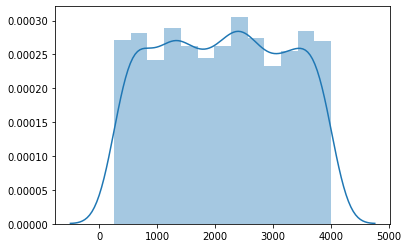

In [13]:
#Histograma dels atributs
sns.distplot(X[:,13])

#### Scatter plot dels atributs més correlacionats (ram i battery_power) amb price_range

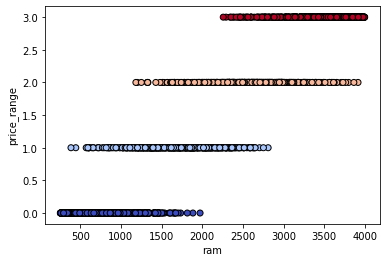

In [14]:
n_classes = 4
    
plt.figure()
plt.xlabel("ram")
plt.ylabel("price_range")
plt.scatter(X[:,13], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

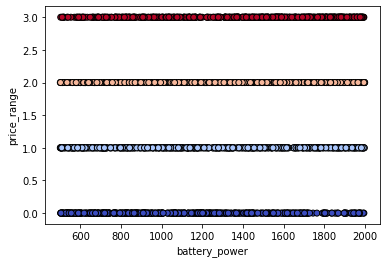

In [15]:
plt.figure()
plt.xlabel("battery_power")
plt.ylabel("price_range")
plt.scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

#### Dades binàries

In [16]:
bool_cols = [col for col in dataset if np.isin(dataset[col].dropna().unique(), [0, 1]).all()]
bool_cols

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

#### Les resta de dades són numèriques (enteres o decimals), no tenim categòriques

### 2- Preprocessing

#### No tenim valors NaN

In [17]:
print(dataset.isnull().values.any())
print(dataset_test.isnull().values.any())

False
False


#### Provem si val la pena tenir amplada i alçada o podem utilitzar la mida de la diagonal. Creem atribut nou, px_diag

In [18]:
dataset['px_diag'] = (dataset['px_height']**2+dataset['px_width']**2)**(1/2)
dataset = dataset.drop(['px_width','px_height'],axis=1)
dataset_test['px_diag'] = (dataset_test['px_height']**2+dataset_test['px_width']**2)**(1/2)
dataset_test = dataset_test.drop(['px_width','px_height'],axis=1)
data = dataset.values
l = len(dataset.columns)
X = data[:, :l-1] 
y = data[:, dataset.columns.get_loc('price_range')]

In [19]:
dataset.corr()['px_diag']['price_range']

0.1803849801917853

#### Creem dataset1 amb els atributs més correlacionats

In [20]:
cols_corr=['battery_power','ram','px_diag','price_range']

In [21]:
dataset1 = dataset[cols_corr]
data1 = dataset1.values
l1 = len(dataset1.columns)
X1 = data1[:, :l1-1] 

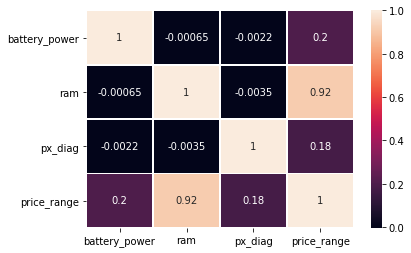

In [22]:
plt.figure()
ax = sns.heatmap(dataset1.corr(), annot=True, linewidths=.5)

#### Normalitzar

In [23]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

In [24]:
Xn = standarize(X)
X1n = standarize(X1)

#### Pairplot

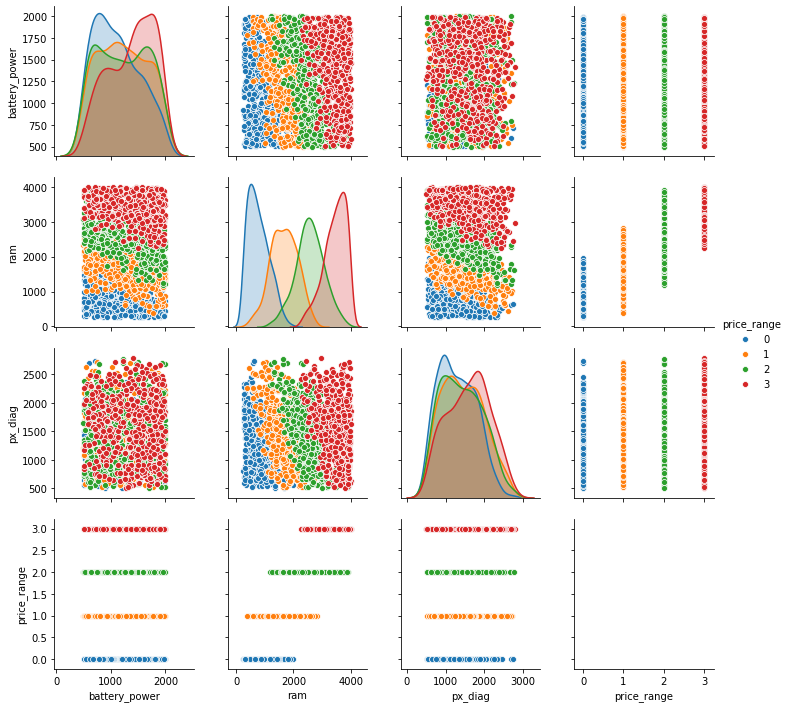

In [25]:
sns.pairplot(dataset1, hue='price_range')

### 3- Model Selection

In [28]:
def models(X, y):
    particions = [0.5, 0.7, 0.8]
    scores = {}
    for part in particions:
        print("PART: "+str(part)+" %")
        x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part, stratify=y)

        #Regresor logístic
        logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
        logireg.fit(x_t, y_t)
        scores["Logístic           "] = round(logireg.score(x_v, y_v),2)
        
        #SVM
        svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
        svc.fit(x_t, y_t)
        probs = svc.predict_proba(x_v)
        scores["SVM                "] = round(svc.score(x_v, y_v),2)
        
        #DecisionTree
        clft = DecisionTreeClassifier(random_state=0, max_depth=2)
        clft.fit(x_t, y_t)
        scores["Decision Tree      "] = round(clft.score(x_v, y_v),2)
        
        #perceptron
        clf = Perceptron(tol=1e-3, random_state=0)
        clf.fit(x_t, y_t)
        scores["Perceptron         "] = round(clf.score(x_v, y_v),2)
        
        #KNeighbors
        neigh = KNeighborsClassifier(n_neighbors=3)
        neigh.fit(x_t, y_t) 
        scores["KNeighbors         "] = round(neigh.score(x_v, y_v),2)
       
        #bagging
        bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
        bagging.fit(x_t, y_t)
        scores["Bagging KNeighbors "] = round(bagging.score(x_v, y_v),2)
        
        #adaboost
        adaB = AdaBoostClassifier(n_estimators=100)
        adaB.fit(x_t, y_t)
        scores["AdaBoost           "] = round(adaB.score(x_v, y_v),2)
        
        sort_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        for i in sort_scores:
            print("Correct classification ", i[0], i[1])
        print("-------------------------------------------------------------------")

#### Amb tots els atributs

In [29]:
models(X,y)

PART: 0.5 %
Correct classification  Decision Tree       1.0
Correct classification  KNeighbors          0.79
Correct classification  Logístic            0.77
Correct classification  AdaBoost            0.75
Correct classification  Bagging KNeighbors  0.69
Correct classification  Perceptron          0.31
Correct classification  SVM                 0.26
-------------------------------------------------------------------
PART: 0.7 %
Correct classification  Decision Tree       1.0
Correct classification  Logístic            0.79
Correct classification  KNeighbors          0.75
Correct classification  AdaBoost            0.75
Correct classification  Bagging KNeighbors  0.74
Correct classification  Perceptron          0.54
Correct classification  SVM                 0.26
-------------------------------------------------------------------
PART: 0.8 %
Correct classification  Decision Tree       1.0
Correct classification  KNeighbors          0.78
Correct classification  Logístic            0.7

#### Amb els atributs més correlacionats

In [30]:
models(X1, y)

PART: 0.5 %
Correct classification  KNeighbors          0.91
Correct classification  Bagging KNeighbors  0.69
Correct classification  AdaBoost            0.65
Correct classification  Decision Tree       0.63
Correct classification  Logístic            0.61
Correct classification  Perceptron          0.29
Correct classification  SVM                 0.26
-------------------------------------------------------------------
PART: 0.7 %
Correct classification  KNeighbors          0.92
Correct classification  Decision Tree       0.76
Correct classification  AdaBoost            0.71
Correct classification  Bagging KNeighbors  0.51
Correct classification  Logístic            0.49
Correct classification  Perceptron          0.31
Correct classification  SVM                 0.26
-------------------------------------------------------------------
PART: 0.8 %
Correct classification  KNeighbors          0.91
Correct classification  Decision Tree       0.78
Correct classification  AdaBoost            

#### Amb dades normalitzades (tots els atributs)

In [31]:
models(Xn, y)

PART: 0.5 %
Correct classification  Decision Tree       1.0
Correct classification  Logístic            0.91
Correct classification  Bagging KNeighbors  0.78
Correct classification  AdaBoost            0.75
Correct classification  Perceptron          0.68
Correct classification  KNeighbors          0.55
Correct classification  SVM                 0.38
-------------------------------------------------------------------
PART: 0.7 %
Correct classification  Decision Tree       1.0
Correct classification  Logístic            0.95
Correct classification  Bagging KNeighbors  0.84
Correct classification  AdaBoost            0.75
Correct classification  Perceptron          0.7
Correct classification  KNeighbors          0.62
Correct classification  SVM                 0.54
-------------------------------------------------------------------
PART: 0.8 %
Correct classification  Decision Tree       1.0
Correct classification  Logístic            0.92
Correct classification  Bagging KNeighbors  0.8


#### Amb els atributs correlacionats i normalitzats

In [53]:
models(X1n, y)

PART: 0.5 %
Correct classification  SVM                 0.93
Correct classification  KNeighbors          0.9
Correct classification  Logístic            0.84
Correct classification  AdaBoost            0.81
Correct classification  Decision Tree       0.77
Correct classification  Perceptron          0.66
Correct classification  Bagging KNeighbors  0.54
-------------------------------------------------------------------
PART: 0.7 %
Correct classification  SVM                 0.93
Correct classification  KNeighbors          0.91
Correct classification  Logístic            0.84
Correct classification  Decision Tree       0.76
Correct classification  AdaBoost            0.76
Correct classification  Perceptron          0.72
Correct classification  Bagging KNeighbors  0.72
-------------------------------------------------------------------
PART: 0.8 %
Correct classification  SVM                 0.94
Correct classification  KNeighbors          0.92
Correct classification  Logístic            0

### 4- Cross Validation

In [33]:
#sorted(sklearn.metrics.SCORERS.keys())

In [63]:
def cross_validation(X, regression, n_folds):
    scores = cross_val_score(regression, X, y, cv=n_folds)
    print ("Scores      :  ", scores)
    print ("Scores Mean :  ", scores.mean())
    print ("Scores std  :  ", scores.std())

In [65]:
folds = 5
print("\nSVM:")
svc = svm.SVC(C=100.0, kernel='rbf', gamma=0.9, probability=True)
cross_validation(X1n, svc, folds)

print("\nLogisticRegression:")
logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
cross_validation(X1n, logireg, folds)

print("\nKNeighborsClassifier:")
neigh = KNeighborsClassifier(n_neighbors=3)
cross_validation(X1n, neigh, folds)

print("\nBaggingClassifier:")
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
cross_validation(X1n, bagging, folds)



SVM:
Scores      :   [0.93   0.9225 0.9225 0.9225 0.9225]
Scores Mean :   0.924
Scores std  :   0.0030000000000000248

LogisticRegression:
Scores      :   [0.845  0.8325 0.855  0.845  0.82  ]
Scores Mean :   0.8394999999999999
Scores std  :   0.012083045973594577

KNeighborsClassifier:
Scores      :   [0.905  0.91   0.9275 0.905  0.9075]
Scores Mean :   0.9109999999999999
Scores std  :   0.008455767262643871

BaggingClassifier:
Scores      :   [0.6925 0.595  0.6925 0.7075 0.6325]
Scores Mean :   0.6639999999999999
Scores std  :   0.043058100283221996


### 5-Metrics Analysis

### Precision Recall and ROC

In [ ]:
# per fer la precision-recall i roc primer cal entrenar un model 
# i apartir daqui es calcula, nidea de si esta be pero es el que fa el profe a lapartat anterior
# es pot probar amb les diferents x i els diferents models

In [47]:
def probs(regression, Xn, y):
    x_t, x_v, y_t, y_v = train_test_split(Xn, y, train_size=0.8, stratify=y)
    regression.fit(x_t,y_t)
    return regression.predict_proba(x_v)

In [66]:
#kneighbors, decision tree
x_t, x_v, y_t, y_v = train_test_split(Xn, y, train_size=0.8, stratify=y)
svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
svc.fit(x_t, y_t)
probs = svc.predict_proba(x_v) #aixo es necessita per precision-recall
print ("Correct classification SVM:                ", svc.score(x_v, y_v))
#Knrigbors
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_t,y_t)
probn = neigh.predict_proba(x_v)
#SVM
svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
svc.fit(x_t, y_t)
probsvm = svc.predict_proba(x_v)

Correct classification SVM:                 0.485


In [67]:
def precision_recall_roc(probs):
    n_classes=4
    # Compute Precision-Recall and plot curve
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
        average_precision[i] = average_precision_score(y_v == i, probs[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                               ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="upper right")

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    # Plot ROC curve
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()

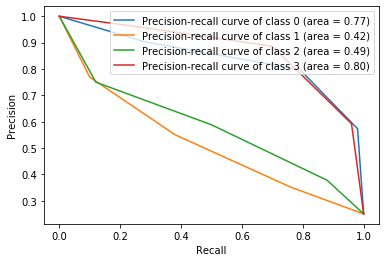

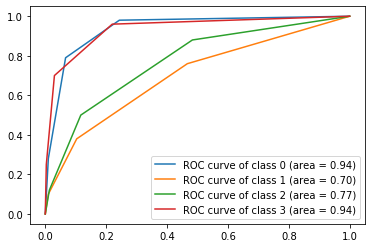

In [51]:
precision_recall_roc(probn)


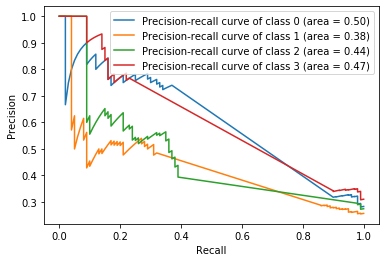

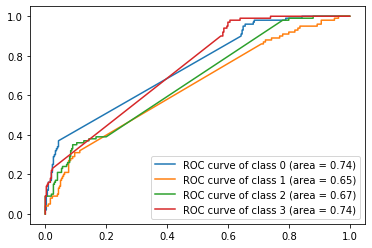

In [68]:
precision_recall_roc(probsvm)

### Classification Reports

In [ ]:
#lo mismo que antes, primer entrenem un model i despres 'calculem' el report
#hem de pensar amb quina base de dades i amb quins models ho fem pq ferho amb tots its imposssible

In [72]:
x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=0.7, stratify=y)
#Regresor logístic
logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
logireg.fit(x_t, y_t)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.001, verbose=0,
                   warm_start=False)

In [73]:
y_true = y_v
y_pred = logireg.predict(x_v)
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.91      0.89       150
     class 1       0.64      0.61      0.63       150
     class 2       0.71      0.69      0.70       150
     class 3       0.96      1.00      0.98       150

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



In [74]:
#SVM
svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
svc.fit(x_t, y_t)
y_true = y_v
y_pred = svc.predict(x_v)
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.04      0.08       150
     class 1       0.62      0.03      0.06       150
     class 2       0.56      0.03      0.06       150
     class 3       0.26      0.98      0.40       150

    accuracy                           0.27       600
   macro avg       0.57      0.27      0.15       600
weighted avg       0.57      0.27      0.15       600



### 6- Hyperparameter Search

In [ ]:
svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
svc.fit(x_t, y_t)
probs = svc.predict_proba(x_v)
scores["SVM                "] = round(svc.score(x_v, y_v),2)

In [88]:
folds = 5
maxi = 0
l = []
for i in range(10):
    l.append(round(i/10,2)+0.1)
print(l)
for c in l:
    svc = svm.SVC(C=3.0, kernel='rbf', gamma=c, probability=True)
    scores = cross_val_score(svc, X1n, y, cv=folds)
    m = scores.mean()
    print(m)
    if (m > maxi):
        maxi = m
        c_max = c
print(c_max)
print(maxi)

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.9, 1.0]
0.9365
0.9395
0.9395
0.938
0.937
0.9349999999999999
0.9345000000000001
0.933
0.9345000000000001
0.933
0.2
0.9395
